In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


fichero = open('iris.data')
lineas = fichero.read()
rows = lineas.split('\n')
data_array = []

for row in rows:
    values = row.split(',')
    if len(values) >= 5:
        data_array.append(values)

datos_matriz = []

for data in data_array:
    fila = []

    if data[0]:
        fila.append(float(data[0]))
    else:
        fila.append(np.nan)  # Utiliza NaN para valores faltantes o no válidos

    if data[1]:
        fila.append(float(data[1]))
    else:
        fila.append(np.nan)

    if data[2]:
        fila.append(float(data[2]))
    else:
        fila.append(np.nan)

    if data[3]:
        fila.append(float(data[3]))
    else:
        fila.append(np.nan)

    if data[4]:
        if data[4] == 'Iris-setosa':
            fila.append(0)
        elif data[4] == 'Iris-versicolor':
            fila.append(1)
        elif data[4] == 'Iris-virginica':
            fila.append(2)
    else:
        fila.append(np.nan)

    datos_matriz.append(fila)

# Convierte la lista de listas en una matriz NumPy
datos_matriz = np.array(datos_matriz)

group1 = datos_matriz[:,0]
group2 = datos_matriz[:,1]
group3 = datos_matriz[:,2]
group4 = datos_matriz[:,3]

In [17]:
print("De la longitud de los sepalos podemos obtener lo siguienete:\n La media de longitud es: " + str(np.mean(group1)) +
       "\n La varianza es: "+ str(np.var(group1)) + "\n La desviación estandar es: " + str(np.std(group1))+"\n\n")

print("De la anchura de los sepalos podemos obtener lo siguienete:\n La media de longitud es: " + str(np.mean(group2)) +
       "\n La varianza es: "+ str(np.var(group2)) + "\n La desviación estandar es: " + str(np.std(group2))+"\n\n")

print("De la longitud de los petalos podemos obtener lo siguienete:\n La media de longitud es: " + str(np.mean(group3)) +
       "\n La varianza es: "+ str(np.var(group3)) + "\n La desviación estandar es: " + str(np.std(group3))+"\n\n")

print("De la anchura de los sepalos podemos obtener lo siguienete:\n La media de longitud es: " + str(np.mean(group4)) +
       "\n La varianza es: "+ str(np.var(group4)) + "\n La desviación estandar es: " + str(np.std(group4))+"\n\n")

De la longitud de los sepalos podemos obtener lo siguienete:
 La media de longitud es: 5.843333333333334
 La varianza es: 0.6811222222222223
 La desviación estandar es: 0.8253012917851409


De la anchura de los sepalos podemos obtener lo siguienete:
 La media de longitud es: 3.0540000000000003
 La varianza es: 0.18675066666666668
 La desviación estandar es: 0.4321465800705435


De la longitud de los petalos podemos obtener lo siguienete:
 La media de longitud es: 3.758666666666666
 La varianza es: 3.092424888888889
 La desviación estandar es: 1.7585291834055212


De la anchura de los sepalos podemos obtener lo siguienete:
 La media de longitud es: 1.1986666666666668
 La varianza es: 0.5785315555555555
 La desviación estandar es: 0.7606126185881716




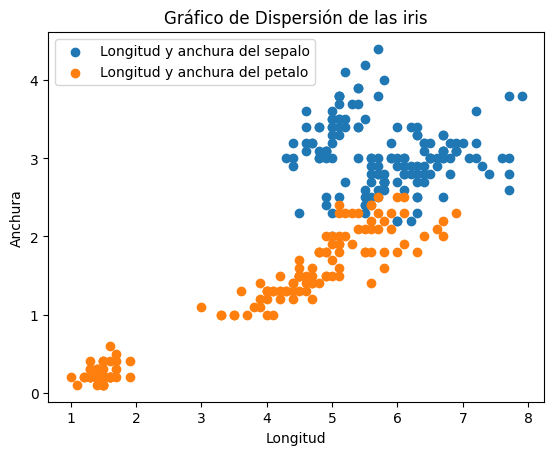

In [23]:
plt.scatter(group1, group2, label='Longitud y anchura del sepalo')
plt.scatter(group3, group4, label='Longitud y anchura del petalo')

#plt.scatter(group2, group3, label='Anchura del sepalo y longitud del petalo')
#plt.scatter(group2, group4, label='Anchura del sepalo y anchura del petalo')

#plt.scatter(group1, group3, label='Longitud del sepalo y longitud del petalo')
#plt.scatter(group1, group4, label='Longitud del sepalo y anchura del petalo')



plt.xlabel('Longitud')
plt.ylabel('Anchura')
plt.title('Gráfico de Dispersión de las iris')
plt.legend()
plt.show()

In [19]:
def pearson (grupo1, grupo2):
    # Calcular la media de cada variable
    grupo1_media = np.mean(grupo1)
    grupo2_media = np.mean(grupo2)

    # Calcular las desviaciones de cada variable con respecto a su media
    desviaciones_grupo1 = grupo1 - grupo1_media
    desviaciones_grupo2 = grupo2 - grupo2_media

    # Calcular el coeficiente de correlación de Pearson
    correlacion = np.sum(desviaciones_grupo1 * desviaciones_grupo2) / \
        np.sqrt(np.sum(desviaciones_grupo1**2) * np.sum(desviaciones_grupo2**2))
    cor =correlacion
    
    return cor


In [20]:
def anova (group1,group2, group3,group4) :
    # Calcular las medias de cada grupo
    mean_group1 = sum(group1) / len(group1)
    mean_group2 = sum(group2) / len(group2)
    mean_group3 = sum(group3) / len(group3)
    mean_group4 = sum(group4) / len(group4)

    # Calcular la media general de todos los datos
    all_data = group1 + group2 + group3 +group4
    mean_total = sum(all_data) / len(all_data)

    # Calcular la suma de los cuadrados de las diferencias entre las medias de los grupos
    ss_between = (
        len(group1) * (mean_group1 - mean_total)**2 +
        len(group2) * (mean_group2 - mean_total)**2 +
        len(group3) * (mean_group3 - mean_total)**2 +
        len(group4) * (mean_group4 - mean_total)**2
    )

    # Calcular la suma de los cuadrados de las diferencias dentro de los grupos
    ss_within = sum((x - mean_group1)**2 for x in group1) + \
            sum((x - mean_group2)**2 for x in group2) + \
            sum((x - mean_group3)**2 for x in group3) + \
            sum((x - mean_group4)**2 for x in group4)

    # Calcular el estadístico F
    #La estadística F es simplemente un cociente de dos varianzas. Las varianzas son una medida
    # de dispersión, es decir, qué tan dispersos están los datos con respecto a la media.
    df_between = 2  # Grados de libertad entre grupos (3 grupos - 1)
    df_within = len(all_data) - 3  # Grados de libertad dentro de los grupos (N - k)
    f_statistic = (ss_between / df_between) / (ss_within / df_within)

    # Calcular el valor p utilizando la distribución F
    p_value = 1 - stats.f.cdf(f_statistic, df_between, df_within)

    # Imprimir resultados
    print(f"Estadístico F: {f_statistic}")
    print(f"Valor p: {p_value}")

    # Evaluar si rechazamos o no la hipótesis nula
    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.\n")
    else:
        print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.\n")


In [21]:
for i in range(0,4):
    for j in range(0,4):
        columna0 = datos_matriz[:, i]
        columna1 = datos_matriz[:, j]
        coeficiente_pearson = pearson(columna0, columna1)
        print("Coeficiente de Pearson entre columna " +str(i) + " y columna " + str(j) + " :", coeficiente_pearson)
    print("\n")

Coeficiente de Pearson entre columna 0 y columna 0 : 1.0
Coeficiente de Pearson entre columna 0 y columna 1 : -0.10936924995064935
Coeficiente de Pearson entre columna 0 y columna 2 : 0.8717541573048712
Coeficiente de Pearson entre columna 0 y columna 3 : 0.8179536333691633


Coeficiente de Pearson entre columna 1 y columna 0 : -0.10936924995064935
Coeficiente de Pearson entre columna 1 y columna 1 : 1.0
Coeficiente de Pearson entre columna 1 y columna 2 : -0.42051609640115445
Coeficiente de Pearson entre columna 1 y columna 3 : -0.3565440896138059


Coeficiente de Pearson entre columna 2 y columna 0 : 0.8717541573048712
Coeficiente de Pearson entre columna 2 y columna 1 : -0.42051609640115445
Coeficiente de Pearson entre columna 2 y columna 2 : 1.0
Coeficiente de Pearson entre columna 2 y columna 3 : 0.9627570970509662


Coeficiente de Pearson entre columna 3 y columna 0 : 0.8179536333691633
Coeficiente de Pearson entre columna 3 y columna 1 : -0.3565440896138059
Coeficiente de Pearso

In [22]:
grupoS = datos_matriz[datos_matriz[:,4]==0]
grupoV = datos_matriz[datos_matriz[:,4]==1]
grupoVR = datos_matriz[datos_matriz[:,4]==2]

print("Diferencia general de caracteriticas")
anova(group1,group2,group3,group4)
print("Diferencia de caracteriticas para la Iris Setosa ")
anova(grupoS[:,0], grupoS[:,1],grupoS[:,2],grupoS[:,3])
print("Diferencia de caracteriticas para la Iris Versicolor ")
anova(grupoV[:,0], grupoV[:,1],grupoV[:,2],grupoV[:,3])
print("Diferencia de caracteriticas para la Iris Virginica ")
anova(grupoVR[:,0], grupoVR[:,1],grupoVR[:,2],grupoVR[:,3])


Diferencia general de caracteriticas
Estadístico F: 7172.784996836186
Valor p: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

Diferencia de caracteriticas para la Iris Setosa 
Estadístico F: 18831.921537492446
Valor p: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

Diferencia de caracteriticas para la Iris Versicolor 
Estadístico F: 18089.045250258016
Valor p: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

Diferencia de caracteriticas para la Iris Virginica 
Estadístico F: 18213.039857569504
Valor p: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

